<a href="https://colab.research.google.com/github/aksesss/PIS/blob/master/PISHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import glob
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def map_chars(path):
  map_characters = {}
  i = 0
  for fold in glob.glob(path + '*', recursive=False):
    map_characters[i] = fold.split('/')[-1]
    i += 1
  return(map_characters)

def load_train_set(path, map_characters, size=(64, 64), n_samples=None):
  pics, labels = [], []
  time_start = time.time()
  
  for (i, char) in map_characters.items():
    print('Loading {}, time {}'.format(char, time.time() - time_start))
    for j, image_path in enumerate(glob.glob(path + char + '/*.*')):
      #print(image_path)
      temp = cv2.imread(image_path)
      temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
      temp = cv2.resize(temp,(size[0],size[1])).astype('float32') / 255.
      if (j % 10 == 0):
        print('\tStep {}:, time {}'.format(j, time.time() - time_start))
      if (j == n_samples):
        break
      pics.append(temp)
      labels.append(i)
  print('Done')
  return(np.array(pics), np.array(labels))


In [0]:
#path = '/content/train_data/'
path = '/content/drive/My Drive/Colab Notebooks/hw/data/simpsons_dataset/'

GLOBAL_PATH = '/content/drive/My Drive/Colab Notebooks/hw/data/'
NUM_CLASSES = 4

In [0]:
map_all_characters = map_chars(path)

In [7]:
list(map_all_characters.values())

['bart_simpson',
 'carl_carlson',
 'barney_gumble',
 'agnes_skinner',
 'apu_nahasapeemapetilon',
 'abraham_grampa_simpson',
 'comic_book_guy',
 'edna_krabappel',
 'fat_tony',
 'chief_wiggum',
 'disco_stu',
 'cletus_spuckler',
 'charles_montgomery_burns',
 'groundskeeper_willie',
 'gil',
 'homer_simpson',
 'lionel_hutz',
 'kent_brockman',
 'krusty_the_clown',
 'marge_simpson',
 'lenny_leonard',
 'maggie_simpson',
 'lisa_simpson',
 'mayor_quimby',
 'milhouse_van_houten',
 'martin_prince',
 'otto_mann',
 'nelson_muntz',
 'principal_skinner',
 'moe_szyslak',
 'patty_bouvier',
 'miss_hoover',
 'ned_flanders',
 'rainier_wolfcastle',
 'ralph_wiggum',
 'professor_john_frink',
 'simpsons_dataset',
 'waylon_smithers',
 'snake_jailbird',
 'sideshow_bob',
 'troy_mcclure',
 'sideshow_mel',
 'selma_bouvier']

In [4]:
#reduse caracters

characters = {}
for k, val in enumerate(['bart_simpson', 'lisa_simpson', 'maggie_simpson', 'marge_simpson']):
  characters[k] = val

characters

{0: 'bart_simpson', 1: 'lisa_simpson', 2: 'maggie_simpson', 3: 'marge_simpson'}

In [5]:
X, y = load_train_set(path, map_characters=characters)

Loading bart_simpson, time 2.6226043701171875e-06
	Step 0:, time 0.02885580062866211
	Step 10:, time 0.08371186256408691
	Step 20:, time 0.13865113258361816
	Step 30:, time 0.21764111518859863
	Step 40:, time 0.2717447280883789
	Step 50:, time 0.3327908515930176
	Step 60:, time 0.39391207695007324
	Step 70:, time 0.463320255279541
	Step 80:, time 0.5177810192108154
	Step 90:, time 0.579817533493042
	Step 100:, time 0.6353051662445068
	Step 110:, time 12.070184707641602
	Step 120:, time 23.124396800994873
	Step 130:, time 34.252663373947144
	Step 140:, time 44.93943500518799
	Step 150:, time 56.053192138671875
	Step 160:, time 67.51238775253296
	Step 170:, time 77.79735803604126
	Step 180:, time 88.85226559638977
	Step 190:, time 99.64667010307312
	Step 200:, time 109.59603548049927
	Step 210:, time 120.28391432762146
	Step 220:, time 131.8750982284546
	Step 230:, time 142.43805480003357
	Step 240:, time 153.40910172462463
	Step 250:, time 163.8307626247406
	Step 260:, time 174.06320071

In [0]:
np.save(GLOBAL_PATH + 'np_images/X_data_b_l_m_m', X)
np.save(GLOBAL_PATH + 'np_images/y_data_b_l_m_m', y)

In [71]:
q.shape

(2920, 64, 64, 3)

In [69]:
%time q = np.load(GLOBAL_PATH + 'np_images/X_data_b_l_m_m.npy')

CPU times: user 3.71 ms, sys: 72.4 ms, total: 76.1 ms
Wall time: 200 ms


In [0]:
#plt.imshow(q[1])

In [9]:
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (2920, 64, 64, 3)
y shape: (2920,)


In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train_ohe = ohe.fit_transform(y_train.reshape(-1, 1))
y_test_ohe = ohe.fit_transform(y_test.reshape(-1,1))

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

Проверим, что все классы присутствуют и в тесте и в треине

In [32]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2, 3]), array([1212, 1221,  115,   80]))
(array([0, 1, 2, 3]), array([130, 133,  13,  16]))


Изобразим датасет

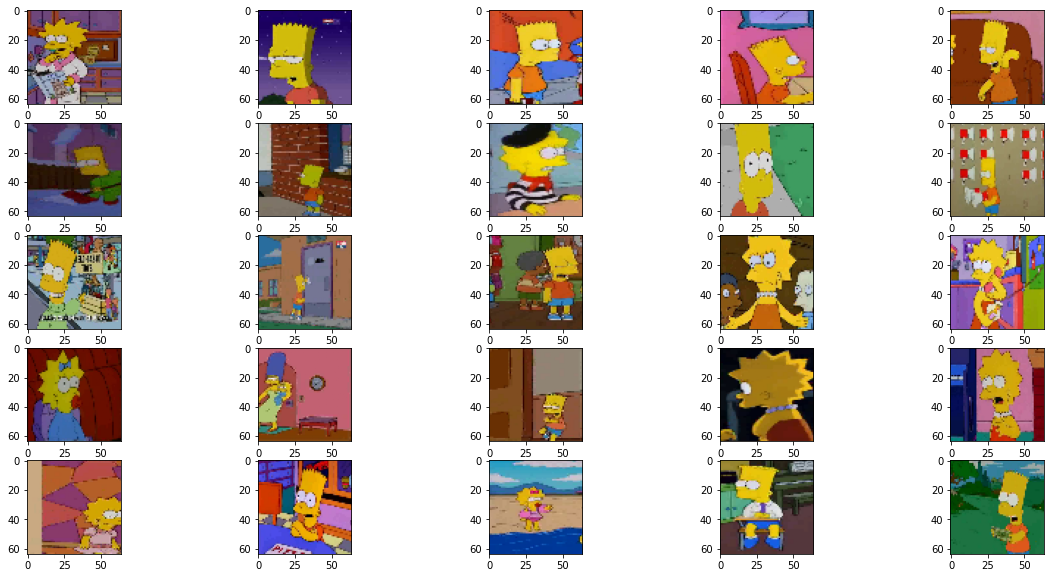

In [33]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.title
    plt.imshow(X_train[np.random.choice(X_train.shape[0])])

Построим модель

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam

def create_model_six_conv(input_shape):
    """
    CNN Keras model with 6 convolutions.
    :param input_shape: input shape, generally X_train.shape[1:]
    :return: Keras model, RMS prop optimizer
    """
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(18, activation='softmax'))
    opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    return model, opt

def load_model_from_checkpoint(weights_path, input_shape=(64,64,3)):
    model, opt = create_model_six_conv(input_shape)
    model.load_weights(weights_path)
    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    return model

In [35]:
%time model = load_model_from_checkpoint(GLOBAL_PATH + 'weights.best.hdf5')

CPU times: user 149 ms, sys: 29.2 ms, total: 178 ms
Wall time: 199 ms


In [36]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 31, 31, 64)       

In [0]:
#model.layers = model.layers[1:-1]

In [0]:
model2 = Sequential()
for l in model.layers[:-4]:
  model2.add(l)
model2.add(Dense(1024, activation='relu'))
#model2.add(Activation('relu'))
model2.add(Dropout(0.9))
model2.add(Dense(4, activation='softmax'))

In [59]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 31, 31, 64)      

In [0]:
opt = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='categorical_crossentropy',
          optimizer=opt,
          metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

es = EarlyStopping(patience=5, monitor='val_accuracy', mode='max')
mc = ModelCheckpoint('/content/weights.h5', monitor='val_accuracy', save_best_only=True, mode='max')


# initialize the number of epochs and batch size
EPOCHS = 1000
BS = 32

# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, 
                         zoom_range=0.15, 
                         width_shift_range=0.2, 
                         height_shift_range=0.2, 
                         shear_range=0.15,
                          horizontal_flip=True, 
                         fill_mode="nearest")

aug.fit(X_train)

In [0]:
#aug.fit(X_train)

In [0]:
#model2.fit(aug.flow(X_train,y_train_ohe, batch_size=BS), y_train_ohe, epochs=100, batch_size=32)

In [0]:
aug = ImageDataGenerator(rotation_range=20, 
                         zoom_range=0.15, 
                         width_shift_range=0.2, 
                         height_shift_range=0.2, 
                         shear_range=0.15,
                          horizontal_flip=True, 
                         fill_mode="nearest")

In [72]:
image_gen_train = ImageDataGenerator(
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

NameError: ignored

In [65]:
history = model2.fit(x=X_train, y=y_train_ohe, batch_size=10, epochs=40, verbose=1, validation_split=0.1, shuffle=True)

Train on 2365 samples, validate on 263 samples
Epoch 1/40
2365/2365 [==============================] - 4s 2ms/step - loss: 1.0515 - accuracy: 0.5230 - val_loss: 1.0046 - val_accuracy: 0.4829
Epoch 2/40
2365/2365 [==============================] - 4s 2ms/step - loss: 0.8267 - accuracy: 0.6698 - val_loss: 1.0426 - val_accuracy: 0.4677
Epoch 3/40
2365/2365 [==============================] - 4s 2ms/step - loss: 0.6894 - accuracy: 0.7370 - val_loss: 1.1641 - val_accuracy: 0.4829
Epoch 4/40
2365/2365 [==============================] - 4s 1ms/step - loss: 0.5754 - accuracy: 0.8021 - val_loss: 1.3467 - val_accuracy: 0.4829
Epoch 5/40
2365/2365 [==============================] - 4s 2ms/step - loss: 0.4940 - accuracy: 0.8313 - val_loss: 1.4250 - val_accuracy: 0.4943
Epoch 6/40
2365/2365 [==============================] - 4s 2ms/step - loss: 0.4452 - accuracy: 0.8376 - val_loss: 1.5622 - val_accuracy: 0.4487
Epoch 7/40
2365/2365 [==============================] - 4s 2ms/step - loss: 0.4026 - accu

In [0]:
y_test_ohe = ohe.transform(y_test.reshape(-1, 1))